**IMPORTANT NOTES** 
- Please complete the code between the two comments: `## START CODE HERE` and `## END CODE HERE`. 
- Be sure to run the codes in order.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
np.random.seed(1)

# Outline
- [1 - Introduction](#1)
  - [1.1 Linear Regression](#1.1)
  - [1.2 Loss Functions](#1.2)
  - [1.3 Gradient Descent](#1.3)
- [2 - Univariate Linear Regression](#2)
- [3 - Multiple Variable Linear Regression](#3)
  - [3.1 Vectorization](#3.1)
  - [3.2 Matrix X Containing Our Examples](#3.2)
  - [3.3 Parameter Vector w, b](#3.3)
  - [3.4 Implementation](#3.4)


<a name="1"></a>
## 1 - Introduction

In this section, you'll see a brief introduction to fundamental concepts of linear regression.


<a name="1.1"></a>
### 1.1 - Linear Regression

Linear regression tries to find a linear connection between an independent variable and one or more dependent variables(a.k.a target values). In a basic linear regression model with just one independent variable, the equation can be represented as:

$$f_{w,b}(x) = wx + b$$

In this equation:
- $y$: The dependent variable, which is the target, the model is trying to predict
- $x$: The independent variable
- $w$: the coefficient or weights which signifies the influence of an independent variable on the dependent variable 
- $b$: The intercept or bias  

$f_{w,b}(x)$ can also be shown as $\hat{y}$. They are the same.  
The fundamental objective of linear regression is to determine the values of w and b that minimize the difference between the predicted values and the actual data points within the dataset. This minimization process is usually achieved by employing a cost function, such as the mean squared error (MSE), and optimization techniques like gradient descent.

Here is a simple datasat as an example:

In [33]:
x = np.array([1, 3, 5, 7])
y = np.array([2000, 3400, 4800, 6200])

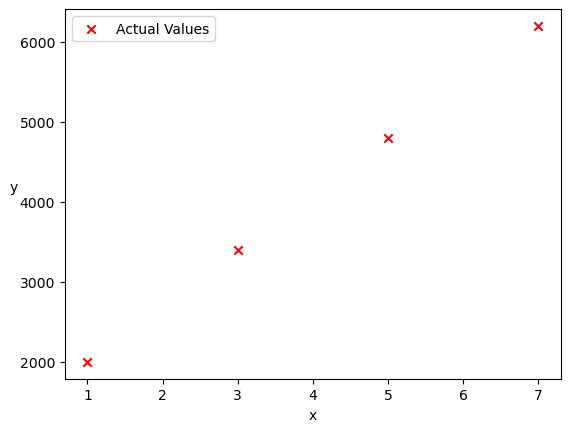

In [34]:
plt.scatter(x, y, c="r", marker="x", label="Actual Values")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend()
plt.show()

Test different values of 'w' and 'b' for yourself. Let's see if you can discover the linear connection between 'x' and 'y'!  
P.S.: `f_wb` stands for 'f(w,b)', which denotes a function of 'w' and 'b'. `f_wb` and `y_pred` are interchangeably used here.

In [35]:
## START CODE HERE
w = 700
b = 1300
## END CODE HERE
f_wb = w*x + b

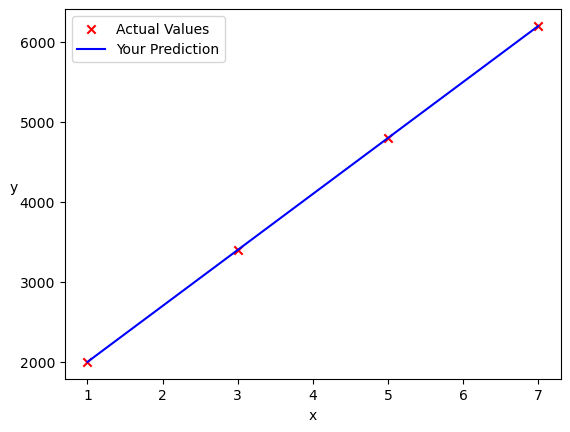

In [36]:
# Plot actual data points
plt.scatter(x, y, c="r", marker="x", label="Actual Values")

# plot your prediction
plt.plot(x, f_wb, c="b", label="Your Prediction" )
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend()
plt.show()

<a name="1.2"></a>
### 1.2 - Loss Functions

Loss functions calculate the difference between real and predicted values. .These functions provide a measure of how well the model is performing in terms of its ability to make accurate predictions. Two commonly used loss functions in linear regression are the Mean Squared Error (MSE) and the Mean Absolute Error (MAE).

#### Mean Squared Error (MSE)

It is perhaps the most widely used loss function in linear regression. The equation for MSE is as follows:

$$J(w,b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 
Where:
- $m$ is the number of data points.
- $y_i$ represents the actual target value.
- $f_{w,b}(x^{(i)})$ represents the predicted value.

#### Mean Absolute Error (MAE)

The Mean Absolute Error provides an alternative approach to measuring prediction errors. The equation for MAE is as follows:

$$J(w,b) = \frac{1}{m} \sum\limits_{i=0}^{m-1} |f_{w,b}(x^{(i)}) - y^{(i)}|$$

Where:
- $m$ is the number of data points.
- $y_i$ represents the actual target value.
- $f_{w,b}(x^{(i)})$ represents the predicted value.

#### Difference between Loss and Cost Functions

While the terms "loss function" and "cost function" are sometimes used interchangeably, there is a subtle difference between the two. The loss function calculates the error for a single data point, while the cost function (or objective function) measures the overall error for the entire dataset. In the context of linear regression, the MSE and MAE are used as loss functions, and they can be summed up to create the cost function.

You have a couple of options to calculate costs:

You can use `np.sum()` to sum all the squared or absolute values (losses) and then perform the division.  
Alternatively, you can use `np.mean()` to combine the summation and division parts.  
Another approach is to use a simple for loop to calculate the loss function, and by adding those individual losses, you can obtain the cost value.  

Also To square each element in a NumPy array, you can use the `**` operator or the `np.square()` function.

Try implementing these two cost functions. You can use `np.sum()`, `np.mean()` or a simple loop over elements in the y_true and y_pred elements.

In [37]:
def mean_squared_error(y_true, y_pred):
## START CODE HERE
    differences = np.subtract(y_true, y_pred)
#     print("differences: ", differences)
    squared_differences = np.square(differences)
#     print("squared_differences: ", squared_differences)
    return squared_differences.mean()
# print("y, f_wb: ", y, f_wb)
## END CODE HERE
print(f'Mean Squared Error (MSE) = {mean_squared_error(y, f_wb)}')

Mean Squared Error (MSE) = 0.0


In [38]:
def mean_absolute_error(y_true, y_pred):
## START CODE HERE
    differences = np.subtract(y_true, y_pred)
#     print("differences: ", differences)
    absolute_differences = np.abs(differences)
#     print("absolute_differences: ", absolute_differences)
    return absolute_differences.mean()
# print("y, f_wb: ", y, f_wb)
## END CODE HERE
print(f'Mean Absolute Error (MAE) = {mean_absolute_error(y, f_wb)}')

Mean Absolute Error (MAE) = 0.0


Double check the results with a calculator to ensure your gwt the correct results! Incorrect mathematical operations can lead to incorrect outcomes, potentially affecting your assignment's grade!

<a name="1.3"></a>
### 1.3 - Gradient Descent

Gradient Descent is a fundamental optimization algorithm used in machine learning and data science to iteratively improve the performance of models. It's a process of fine-tuning model parameters to minimize a specified cost function.

The "gradient" in gradient descent refers to the steepness of the slope or the direction of the steepest increase in the cost function. By repeatedly calculating the gradient and updating model parameters, gradient descent progressively refines the model's ability to make accurate predictions. This iterative process continues until the cost function reaches a minimum, indicating that the model has achieved the best possible fit to the data.

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} w = w -  \alpha \frac{\partial J(w,b)}{\partial w} \; & \newline \; & \phantom {0000} b = b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline & \rbrace\end{align*}$$

And when the loss function is MSE, $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial w}$ are calculated as follows:
$$\frac{\partial J(w,b)}{\partial w}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}$$
$$\frac{\partial J(w,b)}{\partial b}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})$$

* m is the number of training examples in the dataset
* $\alpha$ is learning rate 
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

Perform the mathematical derivations yourself to gain a better understanding of these equations.

In [39]:
w = 200
b = 1500
f_wb = w*x + b

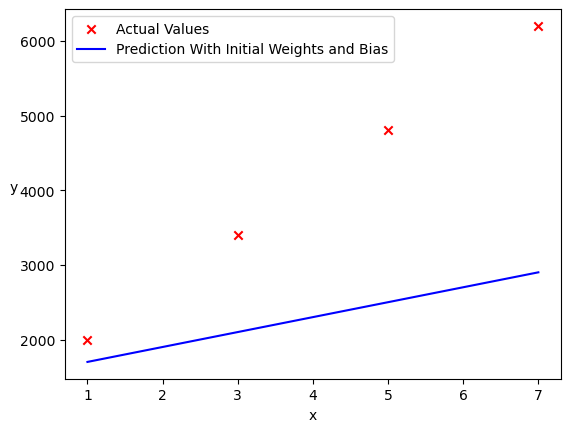

In [40]:
# Plot actual data points
plt.scatter(x, y, c="r", marker="x", label="Actual Values")

# plot initial prediction with initial weights and bias
plt.plot(x, f_wb, c="b", label="Prediction With Initial Weights and Bias" )
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend()
plt.show()

Assume we want to use MSE loss function for this regression task, then calculate $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ .

In [41]:
##  START CODE HERE
# dJ_dw = 2 * sum(x * (f_wb-y)).mean()
dJ_dw = (2/len(x)) * sum(x * (f_wb-y))
dJ_db = (2/len(x)) * sum(f_wb-y)
## END CODE HERE
print(f'dJ/dw:{dJ_dw}\ndJ/db:{dJ_db}')

dJ/dw:-19400.0
dJ/db:-3600.0


**Expected Output**:
<table>
  <tr>
    <td><b>dJ/dw:</td>
    <td>-19400.0</td>
  </tr>
  <tr>
    <td><b>dJ/db:</td>
    <td>-3600.0</td>
  </tr>
</table>

In [42]:
w_prev = w
b_prev = b

In [43]:
learning_rate = 0.02

Do the update step:

In [44]:
## START CODE HERE
w = w_prev - (learning_rate * dJ_dw)
b = b_prev - (learning_rate * dJ_db)
## END CODE HERE
f_wb = w*x + b
print(f'Updated values of weights and bias. w = {w}, b = {b}')
print(f'Mean Absolute Error (MAE) after 1 iteration of Gradient Descent = {mean_squared_error(y, f_wb)}')

Updated values of weights and bias. w = 588.0, b = 1572.0
Mean Absolute Error (MAE) after 1 iteration of Gradient Descent = 93696.0


**Expected Output**:
<table>
  <tr>
    <td>Updated values of weights and bias. w = 588.0, b = 1572.0</td>
  </tr>
  <tr>
    <td>Mean Absolute Error (MAE) after 1 iteration of Gradient Descent = 93696.0</td>
  </tr>
</table>

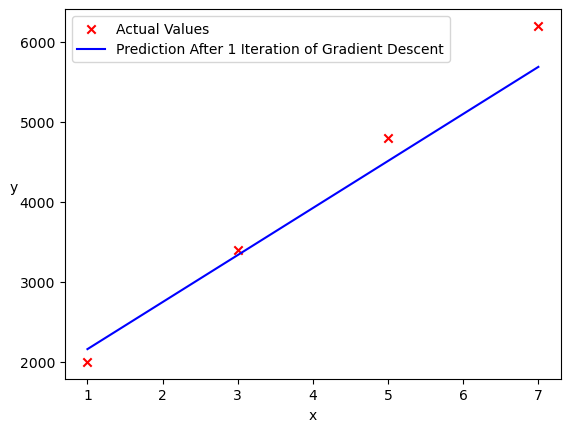

In [45]:
# Plot actual data points
plt.scatter(x, y, c="r", marker="x", label="Actual Values")

# plot initial prediction with initial weights and bias
plt.plot(x, f_wb, c="b", label="Prediction After 1 Iteration of Gradient Descent" )
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend()
plt.show()

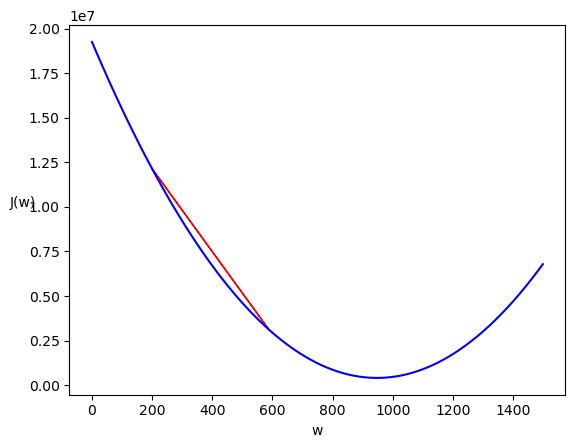

In [46]:
w_values = np.arange(0, 1500)
predictions = np.array([w*x for w in w_values])
J_values = np.array([mean_squared_error(y, prediction) for prediction in predictions])
plt.plot(w_values, J_values, c='b')
plt.xlabel('w')
plt.ylabel('J(w)', rotation=0)
plt.arrow(w_prev, mean_squared_error(y, w_prev*x), w-w_prev,  mean_squared_error(y, w*x)-mean_squared_error(y, w_prev*x), ec='red')
plt.show()

You can see in the figure of `J(w)` vs. `w`, that after one iteration of gradient descent, cost function got closser to the minimum.

<a name="2"></a>
## 2 - Univariate Linear Regression

Now run the following cell to load and then use a more realistic dataset.

In [47]:
df = pd.read_csv('salary_dataset.csv')
x = np.array(df.iloc[:, 1])
y = np.array(df.iloc[:, 2])
print ('Number of training examples (m):', x.shape[0])
df.head().iloc[:, 1:]

Number of training examples (m): 30


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


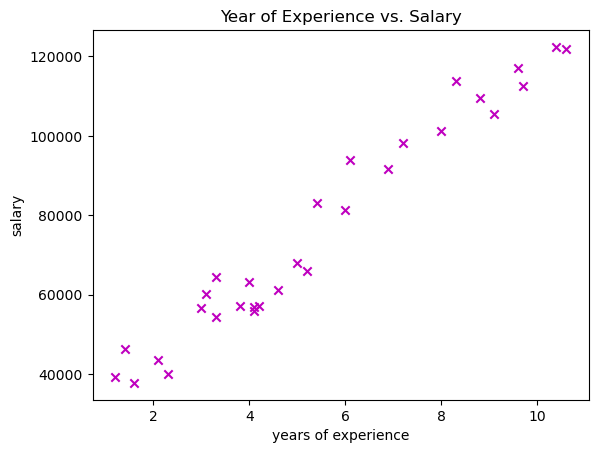

In [48]:
plt.scatter(x, y, marker='x', c='m') 
plt.title("Year of Experience vs. Salary")
plt.ylabel('salary')
plt.xlabel('years of experience')
plt.show()

In the following cell, complete the code with codes you previously wrote. Feel free to use `np.sum` or `np.mean`. Using these built-in NumPy functions is recommended over manual and verbose loops.

In [49]:
class LinearRegression:
    def __init__(self):
        pass

    def train_gradient_descent(self, x, y, learning_rate=0.01, n_iters=100):
        """
        Trains a univariate linear regression model using gradient descent
        """
        # Step 0: Initialize parameters
        n_samples = x.shape[0]
        self.w = 0
        self.b = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of input and weight
            ## START CODE HERE
            y_predict = (self.w * x) + self.b
            # END CODE HERE

            # Step 2: Compute cost over training set
            ## START CODE HERE
            cost = mean_squared_error(y, y_predict)
            ## END CODE HERE
            costs.append(cost)

            print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute gradients
            ## START CODE HERE
            dJ_dw = (2/len(x)) * sum(x * (y_predict-y))
            dJ_db = (2/len(x)) * sum(y_predict-y)
            # END CODE HERE
            
            # Step 4: Update weight and bias
            ## START CODE HERE
            self.w = self.w - (learning_rate * dJ_dw)
            self.b = self.b - (learning_rate * dJ_db)
            # END CODE HERE

        return self.w, self.b, costs

    def predict(self, x):
        return self.w * x + self.b

Cost at iteration 0: 6503107277.733334
Cost at iteration 1: 5575601199.408895
Cost at iteration 2: 4783307298.0784235
Cost at iteration 3: 4106512380.5013866
Cost at iteration 4: 3528377330.3799305
Cost at iteration 5: 3034518083.485675
Cost at iteration 6: 2612647694.346654
Cost at iteration 7: 2252270587.675338
Cost at iteration 8: 1944421386.2847452
Cost at iteration 9: 1681441816.4817863
Cost at iteration 10: 1456790139.4475951
Cost at iteration 11: 1264878366.491892
Cost at iteration 12: 1100933207.442792
Cost at iteration 13: 960877292.0092989
Cost at iteration 14: 841227708.4267061
Cost at iteration 15: 739009334.6187203
Cost at iteration 16: 651680805.2073848
Cost at iteration 17: 577071272.1325349
Cost at iteration 18: 513326385.2308862
Cost at iteration 19: 458862148.5545239


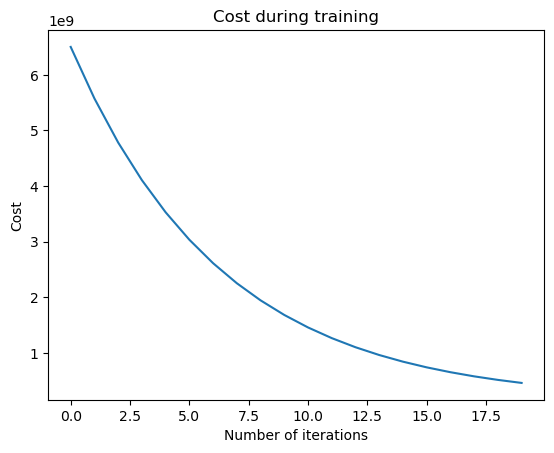

In [50]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(x, y, learning_rate=0.001, n_iters=20)

plt.plot(np.arange(len(costs)), costs)
plt.title("Cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [51]:
yrs_of_expr = 7.5
prediction = regressor.predict(yrs_of_expr)

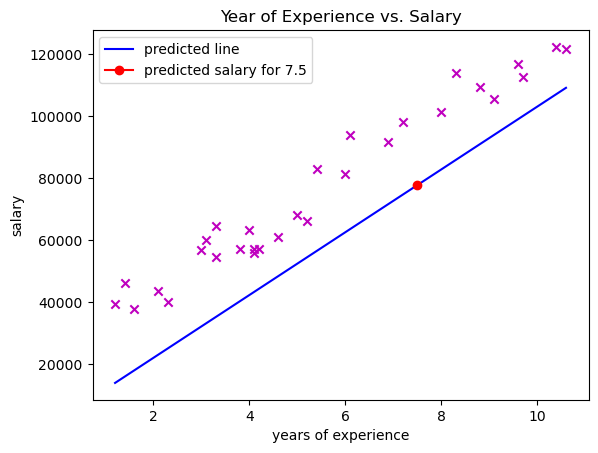

In [52]:
plt.scatter(x, y, marker='x', c='m') 
plt.plot(x, regressor.predict(x), label='predicted line', c='b')
plt.plot(yrs_of_expr, prediction, label=f'predicted salary for {yrs_of_expr}', marker='o', c='r', markersize=6)
plt.title("Year of Experience vs. Salary")
plt.ylabel('salary')
plt.xlabel('years of experience')
plt.legend()
plt.show()

<a name="3"></a>
## 3 - Multiple Variable Linear Regression

In multiple variable linear regression, we expand our ability to predict outcomes using not just one, but several independent variables.
First, let's familiarize ourselves with some key concepts.

<a name="3.1"></a>
### 3.1 - Vectorization
Vectors vs For Loops, which one to use? We prefer vectorization because of  its brevity and superior efficiency.

**Using a for loop** implement a function which gets two vectors and output their dot product:(don't worry about the potential shape mismatch).
$$ a.b = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape, (n,).

In [53]:
def dot_product(a , b):
    ## START CODE HERE
    dp = 0
    for i in range(len(a)):
        dp += (a[i]*b[i])
    return dp
    ## END CODE HERE
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 1, 0])
print(f'a.b={dot_product(a, b)}')

a.b=7


**Expected Output**:
<table>
  <tr>
    <td> <b>a.b=7</td> 
  </tr>
</table>

Now let's do a speed comparison between dot product calculation you've implemented using a for loop and numpy's built-in version which use vectorization:

In [54]:
np.random.seed(1)
a = np.random.rand(10000000)
b = np.random.rand(10000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()
print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()
c = dot_product(a,b)
toc = time.time()
print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

np.dot(a, b) =  2501072.5817
Vectorized version duration: 15.8985 ms 


my_dot(a, b) =  2501072.5817
loop version duration: 2487.6783 ms 


As you can see, vectorization provides a large speed up in this example. This is because NumPy makes better use of available data parallelism in the underlying hardware. GPU's and modern CPU's implement Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel. This is critical in Machine Learning where the data sets are often very large.

<a name="3.2"></a>
### 3.2 - Matrix X Containing Our Examples

Consider the following task illustrated in the table below. The rows represent training samples, while the columns are input features.

| Size (sqft) | Number of Bedrooms  | Number of Floors | Age of Home | Price (1000s dollars)  |
| ---------------- | ------------------- | ---------------- | ----------- | ----------- |
| 2104                | 5                           | 1                       | 45                | 460                |
| 1416                | 3                           | 2                       | 40                | 232                |
| 852                  | 2                           | 1                       | 35                | 178                |

In multiple variable linear regression, it's common to organize our inputs in a matrix and our weights and outputs in vectors. We typically use `X` to denote our input matrix. Each row of the matrix represents one example. In a scenario with $m$ training examples (in this example, $m$ is three), and there are $n$ features (four in this example), the matrix $\mathbf{X}$ has dimensions ($m$, $n$) – m rows and n columns.

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

Notation:
- $\mathbf{x}^{(i)}$ is a vector containing example i: $\mathbf{x}^{(i)} = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parentheses indicates the example number, while the subscript represents an element.

<a name="3.3"></a>
### 3.3 Parameter Vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

<a name="3.4"></a>
### 3.4 Implementation

#### Model Prediction
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x^{(i)}}) =  w_0x^{(i)}_0 + w_1x^{(i)}_1 +... + w_{n-1}x^{(i)}_{n-1} + b$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x^{(i)}}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b $$ 
where $\cdot$ is a vector `dot product` and $\mathbf{x^{(i)}}$ is **i-th sample** of the input, with shape (num_features,).  

We can extend this to calculate $f_{\mathbf{w},b}$ the for all samples.
$$ f_{\mathbf{w},b}(\mathbf{X}) = \mathbf{w} \cdot \mathbf{X} + b $$ 

Complete the following code to calculate single prediction from the equation below (vector notation). Use `np.dot`.  
`X` is of shape $(m, n)$ and `w` is of shape $(n,)$, and the result of dot product will be of shape $(m,)$ . Adding this to a scallar(`b`) yeilds us a shape of $(m,)$ for `f_wb`. Look up broadcasting in python for more info.

In [55]:
np.random.seed(1)
num_samples = 20
num_features = 5
X = np.random.randint(1, 10, size=(num_samples, num_features)) # shape = (20, 5)
y = np.random.randint(1, 10, size=(num_samples)) # shape =(20,)
w = np.random.randint(1, 10, size=num_features) # shape = (5,)
b = np.random.randint(1, 10) # scalar

m = X.shape[0]
## START CODE HERE               
f_wb_X = np.dot(X, w) + b
## END CODE HERE
print(f'y_true:{y}\ny_pred:{f_wb_X}')

y_true:[3 8 3 7 1 3 7 7 3 8 8 1 7 6 2 5 7 1 7 6]
y_pred:[ 63  86  75  98  70 119  89  79  52 136 109  69  86  81  97 116 132  66
  82  72]


**Expected Output**:
<table>
  <tr>
    <td><b>y_true:</td>
    <td>[3 8 3 7 1 3 7 7 3 8 8 1 7 6 2 5 7 1 7 6]</td>
  </tr>
  <tr>
    <td><b>y_pred:</td>
    <td>[ 63  86  75  98  70 119  89  79  52 136 109  69  86  81  97 116 132  66  82  72]</td>
  </tr>
</table>

#### Compute Cost
The equation for the MSE cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to univariate linear regression, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars.

Complete the following code to calculate cost over all training samples.  
**HINT**: You can use `np.sum` to sum over elemnts of $f_{\mathbf{w},b}(\mathbf{X})$ minus $y$, then devide by `m`, both $f_{\mathbf{w},b}(\mathbf{X})$ and $y$ are of shape $(m,)$(refer to the previous cell to see why $f_{\mathbf{w},b}(\mathbf{X})$  has this shape). Use `**2` to square elements of an array.

In [56]:
np.random.seed(1)
num_samples = 20
num_features = 5
X = np.random.randint(1, 10, size=(num_samples, num_features)) # shape = (20, 5)
y = np.random.randint(1, 10, size=(num_samples)) # shape =(20,)
w = np.random.randint(1, 10, size=num_features) # shape = (5,)
b = np.random.randint(1, 10) # scalar

m = X.shape[0]
## START CODE HERE               
f_wb_X = np.dot(X, w) + b
cost = mean_squared_error(y, f_wb_X)
## END CODE HERE
print(f'y_true:{y}\ny_pred:{f_wb_X}')
print(f'cost:{cost}')

y_true:[3 8 3 7 1 3 7 7 3 8 8 1 7 6 2 5 7 1 7 6]
y_pred:[ 63  86  75  98  70 119  89  79  52 136 109  69  86  81  97 116 132  66
  82  72]
cost:7496.35


Expected Output:

<table>
  <tr>
    <td><b>y_true:</td>
    <td>[3 8 3 7 1 3 7 7 3 8 8 1 7 6 2 5 7 1 7 6]</td>
  </tr>
  <tr>
    <td><b>y_pred:</td>
    <td>[ 63  86  75  98  70 119  89  79  52 136 109  69  86  81  97 116 132  66  82  72]</td>
  </tr>
  <tr>
    <td><b>cost:</td>
    <td>7496.35</td>
  </tr>
</table>

<p align="center"><b><font size="5">**********************OPTIONAL**********************</font></b></p>

#### Gradient Descent for Multiple Variables

Compute the partial derivatives of the cost function with respect to each parameter:
$$\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}$$
$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{2}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})$$
* m is the number of training examples in the dataset

The gradient containing all partial derivatives can then be computed as follows:(I wrote $\hat{y}$ instead of $f_{\mathbf{w},b}(\mathbf{X})$, for simplicity)

$$\nabla_{\boldsymbol{w}} J = \frac{2}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$$
$$\nabla_{\boldsymbol{b}} J = \frac{2}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$$

Pay attention to the fact that both $\hat{y}$ and $y$ are of shape $(m,)$ and $X$ is of shape $(m, n)$.

**You don't need to implement anything *NEW* in the following cell**

In [57]:
np.random.seed(1)
num_samples = 20
num_features = 5
X = np.random.randint(1, 10, size=(num_samples, num_features)) # shape = (20, 5)
y = np.random.randint(1, 10, size=(num_samples)) # shape =(20,)
w = np.random.randint(1, 10, size=num_features) # shape = (5,)
b = np.random.randint(1, 10) # scalar

m = X.shape[0]
## START CODE HERE               
f_wb_X = np.dot(X, w) + b
cost = mean_squared_error(y, f_wb_X)
## END CODE HERE
dJ_dw = (2 / m) * np.dot(X.T, (f_wb_X - y)) # same shape as w which is (5,)
dJ_db = (2 / m) * np.sum((f_wb_X - y)) # same shape as b which is scalar

print(f'y_true:{y}\ny_pred:{f_wb_X}')
print(f'dJ_dw:{dJ_dw}\ndJ_db:{dJ_db}')

y_true:[3 8 3 7 1 3 7 7 3 8 8 1 7 6 2 5 7 1 7 6]
y_pred:[ 63  86  75  98  70 119  89  79  52 136 109  69  86  81  97 116 132  66
  82  72]
dJ_dw:[ 852.9 1088.4 1090.1  775.1  780.8]
dJ_db:167.70000000000002


Expected Output:

<table>
  <tr>
    <td><b>y_true:</td>
    <td>[3 8 3 7 1 3 7 7 3 8 8 1 7 6 2 5 7 1 7 6]</td>
  </tr>
  <tr>
    <td><b>y_pred:</td>
    <td>[ 63  86  75  98  70 119  89  79  52 136 109  69  86  81  97 116 132  66  82  72]</td>
  </tr>
  <tr>
    <td><b>dJ_dw:</td>
    <td>[ 852.9 1088.4 1090.1  775.1  780.8]</td>
  </tr>
  <tr>
    <td><b>dJ_db:</td>
    <td>167.70000000000002</td>
  </tr>
</table>

In [58]:
class LinearRegressionMultipleVariable:
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a univariate linear regression model using gradient descent
        """
        # Step 0: Initialize parameters
        n_samples, n_features = X.shape
        self.w = np.zeros(shape=(n_features,))
        self.b = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of input and weight
            ## START CODE HERE
            y_predict = np.dot(X, self.w) + self.b
            # END CODE HERE

            # Step 2: Compute cost over training set
            ## START CODE HERE
            cost = mean_squared_error(y, y_predict)
            ## END CODE HERE
            costs.append(cost)

            if i % 10 == 0:
                print(f"Cost at iteration {i}: {cost}")
            # Step 3: Compute gradients
            ## START CODE HERE
            dJ_dw = (2/len(X)) * sum(np.dot(np.transpose(X), (y_predict-y)))
            dJ_db = (2/len(X)) * sum(y_predict-y)
            # END CODE HERE
            
            # Step 4: Update weight and bias
            ## START CODE HERE
            self.w = self.w - (learning_rate * dJ_dw)
            self.b = self.b - (learning_rate * dJ_db)
            # END CODE HERE

        return self.w, self.b, costs

    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [59]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=6, noise=1, random_state=42)
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]
print(X_train)
print(y_train)

[[ 1.12411272  0.94752646 -0.77287767 -0.01870876 -0.38851845  0.40705229]
 [ 0.4572804   1.45582232  0.70450654 -0.7341738   0.08199556  0.78905669]
 [ 1.02915564  0.47259748  0.25602973  0.40825276 -1.7025836   0.98269098]
 ...
 [ 1.39345453  0.7105491   0.42934082 -0.39305276  1.00163183  0.37963965]
 [-0.43676424 -1.6065771   1.7495839  -0.1314726   0.82604717  1.38145408]
 [-0.02921641  0.77511512 -1.04552949  0.07557637  1.04886414 -0.02626079]]
[-1.01398345e+01  1.10885330e+02  7.97657741e+01 -3.31760441e+01
  1.91998404e+01 -4.35765592e+01 -1.56431914e+02  6.11750837e+00
  3.77865887e+01 -7.34506896e+00 -1.05282865e+02 -1.19329803e+02
  1.30660873e+02 -2.02468453e+01 -2.35709058e+02  1.30401133e+02
 -1.99094012e+02 -1.49515208e+02 -6.17314010e+01 -4.31521129e+01
 -6.94092743e+00 -9.17677740e+01 -5.32991387e+00  7.07260888e+00
  8.08970888e+01 -9.36808574e+01 -8.62575704e+01  1.06781314e+02
  3.59296053e+01 -9.40664446e+01 -8.77328607e+01 -5.81096830e+01
  3.95532539e+02  6.0119

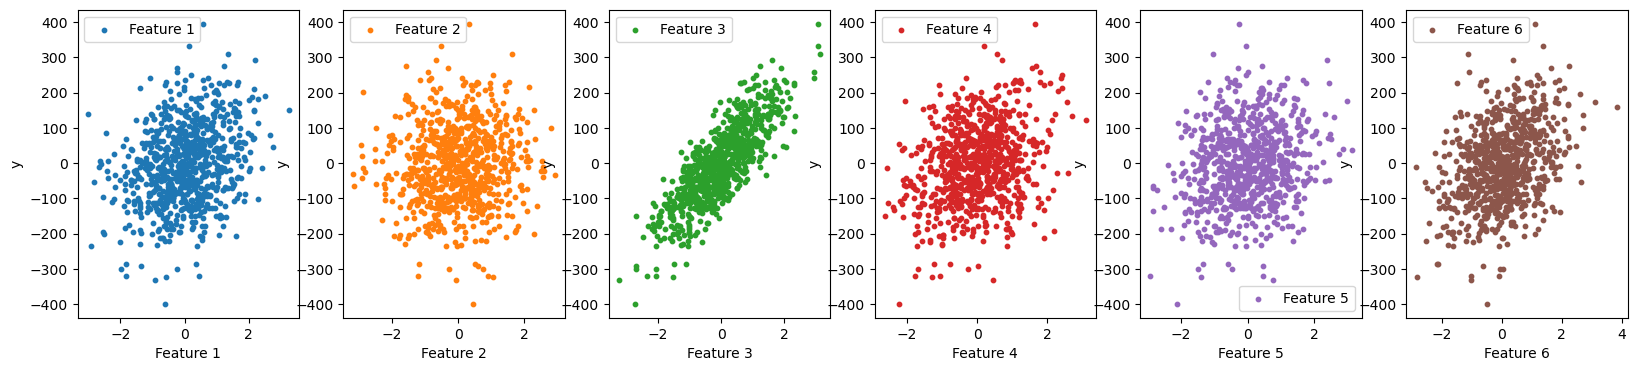

In [60]:
num_subplots = X_train.shape[1]
fig, axes = plt.subplots(1, num_subplots, figsize=(20, 4))
for i in range(num_subplots):
    axes[i].scatter(X_train[:, i], y_train, label=f'Feature {i+1}', color=f'C{i}', s=10)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('y')
    axes[i].legend()
plt.show()

Cost at iteration 0: 12597.525065676326
Cost at iteration 10: 4466.678014126229
Cost at iteration 20: 3717.4342043037705
Cost at iteration 30: 3648.296530636837
Cost at iteration 40: 3641.8525689147855
Cost at iteration 50: 3641.209179070073
Cost at iteration 60: 3641.1167030965853
Cost at iteration 70: 3641.0860129048756
Cost at iteration 80: 3641.0683810656205
Cost at iteration 90: 3641.0568710244193
Cost at iteration 100: 3641.0492094760743
Cost at iteration 110: 3641.044095710841
Cost at iteration 120: 3641.0406811976572
Cost at iteration 130: 3641.038401173741
Cost at iteration 140: 3641.036878688367
Cost at iteration 150: 3641.0358620481484
Cost at iteration 160: 3641.035183186142
Cost at iteration 170: 3641.034729875695
Cost at iteration 180: 3641.0344271774147
Cost at iteration 190: 3641.0342250504855


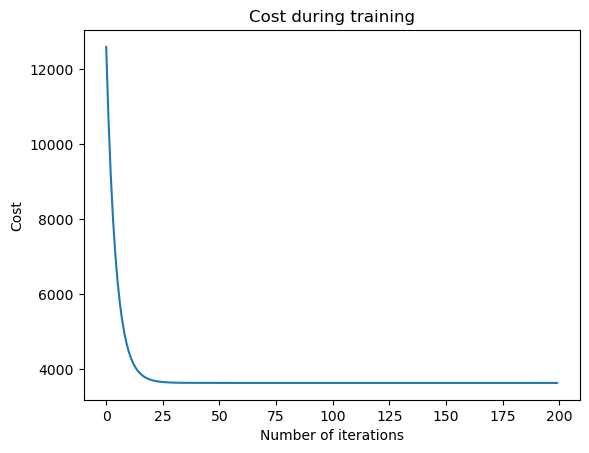

In [61]:
regressor = LinearRegressionMultipleVariable()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.01, n_iters=200)

plt.plot(np.arange(len(costs)), costs)
plt.title("Cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

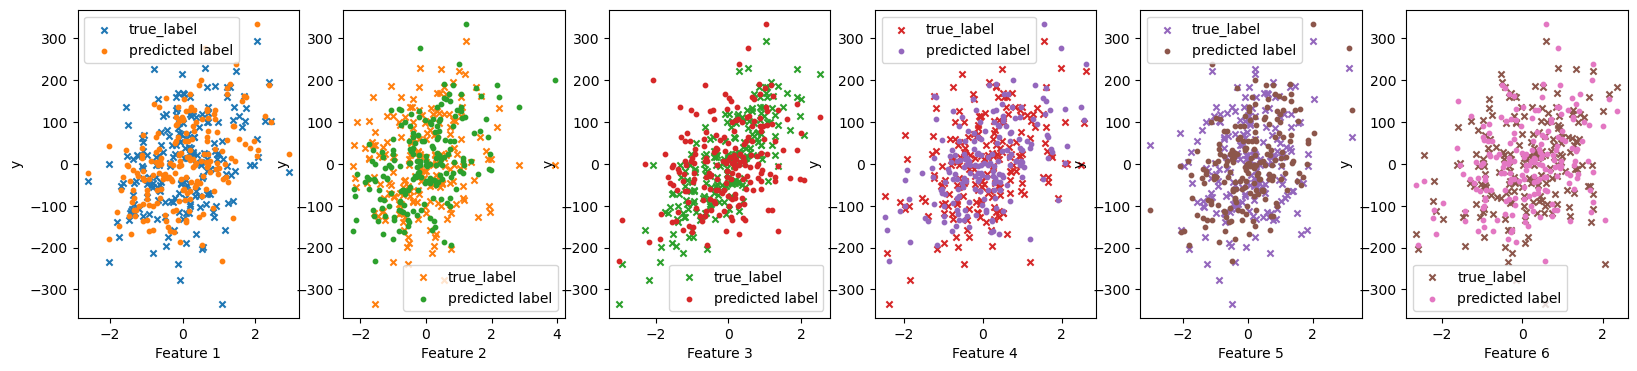

In [62]:
num_subplots = X_train.shape[1]
fig, axes = plt.subplots(1, num_subplots, figsize=(20, 4))
for i in range(num_subplots):
    axes[i].scatter(X_test[:, i], y_test, label=f'true_label', marker='x', color=f'C{i}', s=20)
    axes[i].scatter(X_test[:, i], regressor.predict(X_test), label=f'predicted label', marker='o', color=f'C{i+1%6}', s=10)
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('y')
    axes[i].legend()
plt.show()